In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power
import sys
from Generate_Data import Generate
from Lasso_Linear import Lasso_Linear

In [2]:
funcs = [
    lambda x: np.power(x, 1),
    lambda x: np.power(x, 2),
    lambda x: np.power(x, 3),
    lambda x: np.power(x, 4),
    lambda x: np.power(x, 5)
]
difffunc = lambda X,t,lamb,w: -2.0*(X.T).dot(t) + 2.0*(X.T).dot(X).dot(w) + lamb*np.sign(w)

func = lambda X,t,lamb,w: ((t - X.dot(w)).T).dot(t - X.dot(w)) + lamb*np.sum(np.absolute(w))

sigma = 0.1
Nsample = 50
lamda = 0
eta = 0.000000002
eps = 0.000000001
steps = 5000000
flimit = 5

In [3]:
gr = Generate(Nsample, sigma, funcs)

xTrain, yTrain = gr.train_data()
xTrain_features = gr.extract_features(xTrain)

ls = Lasso_Linear(xTrain_features, yTrain, lamda, eta, eps, flimit, steps, func, difffunc)
ls.fit()

init w: [[-5.89489648]
 [-9.37409286]
 [ 9.3562206 ]
 [-6.80182927]
 [ 8.10409571]
 [-1.48575411]]
-----------
w = 
[[-5.89487134]
 [-9.37391731]
 [ 9.35734945]
 [-6.79484993]
 [ 8.14642761]
 [-1.23145756]]
f(w) = [[5433467.08155718]]
at step: 0
-----------
w = 
[[-5.85066653]
 [-9.40237879]
 [ 8.96349261]
 [-8.61972121]
 [ 2.75130683]
 [-0.25443613]]
f(w) = [[14397.82215236]]
at step: 50000
-----------
w = 
[[-5.75838278]
 [-9.24948524]
 [ 9.22169371]
 [-8.32013229]
 [ 2.591005  ]
 [-0.23721539]]
f(w) = [[12253.50117294]]
at step: 100000
-----------
w = 
[[-5.67234461]
 [-9.10828924]
 [ 9.45919456]
 [-8.04511739]
 [ 2.44374758]
 [-0.22139261]]
f(w) = [[10439.3072224]]
at step: 150000
-----------
w = 
[[-5.59205458]
 [-8.97785386]
 [ 9.67765728]
 [-7.79270044]
 [ 2.30848612]
 [-0.20685545]]
f(w) = [[8904.34288587]]
at step: 200000
-----------
w = 
[[-5.51705519]
 [-8.8573174 ]
 [ 9.8786105 ]
 [-7.56106409]
 [ 2.18425637]
 [-0.19350057]]
f(w) = [[7605.55843714]]
at step: 250000
--------

-----------
w = 
[[-4.15384657]
 [-7.24489279]
 [12.15770857]
 [-5.17086528]
 [ 0.85707053]
 [-0.04936553]]
f(w) = [[363.36726081]]
at step: 2750000
-----------
w = 
[[-4.14048198]
 [-7.23729016]
 [12.16074941]
 [-5.17280192]
 [ 0.85705901]
 [-0.0493303 ]]
f(w) = [[360.87300322]]
at step: 2800000
-----------
w = 
[[-4.12722924]
 [-7.22984175]
 [12.16355997]
 [-5.17498168]
 [ 0.85718167]
 [-0.04930961]]
f(w) = [[358.43507523]]
at step: 2850000
-----------
w = 
[[-4.11408275]
 [-7.22253728]
 [12.16615834]
 [-5.17738317]
 [ 0.85742713]
 [-0.04930224]]
f(w) = [[356.04732188]]
at step: 2900000
-----------
w = 
[[-4.10103738]
 [-7.21536725]
 [12.16856118]
 [-5.17998674]
 [ 0.85778494]
 [-0.04930706]]
f(w) = [[353.70451729]]
at step: 2950000
-----------
w = 
[[-4.08808837]
 [-7.20832295]
 [12.1707838 ]
 [-5.18277429]
 [ 0.85824549]
 [-0.04932306]]
f(w) = [[351.40222159]]
at step: 3000000
-----------
w = 
[[-4.07523136]
 [-7.20139634]
 [12.17284026]
 [-5.18572921]
 [ 0.85879994]
 [-0.04934928]

In [4]:
xPre, yPre = gr.predict_data()
xPre_features = gr.extract_features(xPre)

yPre_out,mse = ls.predict(xPre_features, yPre)
print("MSE: ", mse)

MSE:  4.558473852650215


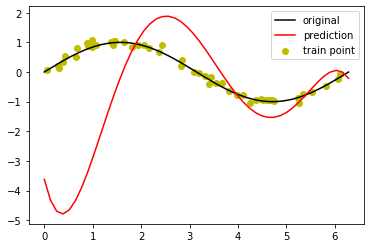

In [5]:
ori = np.linspace(0, 2*np.pi, 200)
plt.plot(ori,np.sin(ori),c ='k',label = "original")
plt.scatter(xTrain, yTrain, c = 'y',label = "train point")
plt.plot(xPre.ravel(),yPre_out.ravel(),c = 'r',label = "prediction")
#plt.ylim(-2, 2)
plt.legend()
plt.show()